# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [14]:
# Resolver acá
#instalar la API del Banco Mundial y pandas si no lo tienen
!pip install wbdata
!pip install pandas
#importar wbdata y pandas
import wbdata
import pandas as pd
#Definir indicadores
indicadores = {'NY.GDP.PCAP.CD':'GDP per capita (US$)','NY.GDP.PCAP.CN':'GDP per capita (LCU)'}
#NY.GDP.PCAP.CD     GDP per capita (current US$)
#NY.GDP.PCAP.CN     GDP per capita (current LCU)
#obtener datos y definir paises
data = wbdata.get_dataframe(indicadores, country=['BRA','GBR'])
#crear DataFrame
df = pd.DataFrame(data=data)
#mostrar los datos en una tabla
df

GDP per capita (US$)  GDP per capita (LCU)
country        date                                            
Brazil         2023          10294.866681          51416.476253
               2022           9281.333344          47928.526951
               2021           7972.536650          43007.059680
               2020           7074.193783          36468.735231
               2019           9029.833267          35617.915458
...                                   ...                   ...
United Kingdom 1964           1748.288118            624.388889
               1963           1613.456884            576.234856
               1962           1525.775853            544.920188
               1961           1472.385714            525.852273
               1960           1397.594803            499.141221

[128 rows x 2 columns]

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

object


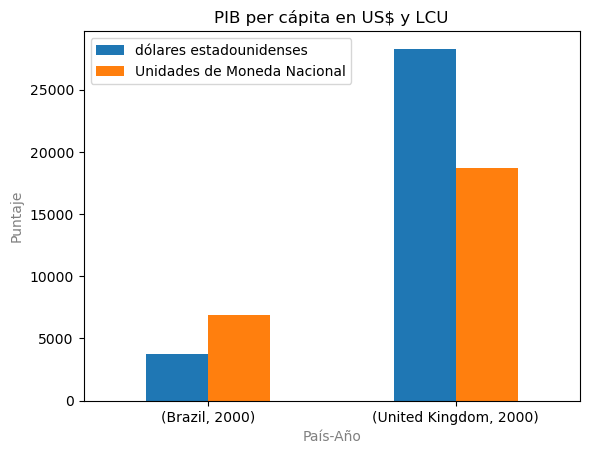

In [34]:
# Resolver acá
#instalar la API del Banco Mundial y pandas si no lo tienen
!pip install wbdata
!pip install pandas
#importar wbdata y pandas
import wbdata
import pandas as pd
#Definir indicadores
indicadores = {'NY.GDP.PCAP.CD':'GDP per capita (US$)','NY.GDP.PCAP.CN':'GDP per capita (LCU)'}
#NY.GDP.PCAP.CD     GDP per capita (current US$)
#NY.GDP.PCAP.CN     GDP per capita (current LCU)
#obtener datos y definir paises
data = wbdata.get_dataframe(indicadores, country=['BRA','GBR'])
#crear DataFrame
df = pd.DataFrame(data=data)
#mostrar los datos en una tabla
df
# Dejamos índice como columnas
df.reset_index(inplace=True)
df
#como mostrar todos los datos en un solo gráfico no se ve nada, entonces hago mostrar los datos del año 2000
#si quieren ver los datos de otros años, pueden cambiar el df_2000 a df_(el año que quieren) y df[df["date"]=="2000"] a df[df["date"]=="(el año que quieren)"]
#primero hago la tabla del año 2000
print(df["date"].dtype)
df_2000 = df[df["date"]=="2000"]
df_2000
df_2000 = df_2000.set_index(["country", "date"])
df_2000
#ahora graficamos
ax = df_2000.plot(kind='bar', title='PIB per cápita en US$ y LCU')
ax.set_xlabel('País-Año',color='grey')
ax.set_ylabel('Puntaje',color='grey')
ax.tick_params(axis="x", rotation=0)
ax.legend(["dólares estadounidenses","Unidades de Moneda Nacional"])

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [38]:
# Resolver acá estilo pyplot
#instalar matplotlibla, API del Banco Mundial y pandas si no lo tienen
!pip install wbdata
!pip install pandas
!pip install matplotlib
#importar wbdata y pandas
import wbdata
import matplotlib.pyplot as plt
import pandas as pd
#Definir indicadores
indicadores = {'NY.GDP.PCAP.CD':'GDP per capita (US$)','NY.GDP.PCAP.CN':'GDP per capita (LCU)'}
#NY.GDP.PCAP.CD     GDP per capita (current US$)
#NY.GDP.PCAP.CN     GDP per capita (current LCU)
#obtener datos y definir paises
data = wbdata.get_dataframe(indicadores, country=['BRA','GBR'])
#crear DataFrame
df = pd.DataFrame(data=data)

In [ ]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
#instalar requests, BeautifulSoup4 y pandas si no lo tienen
!pip install requests 
!pip install BeautifulSoup4 
!pip install pandas
#importar requests, BeautifulSoup4 y pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd
